In [1]:
# Remember to login to wandb!
import sys
import os 
import torch
import matplotlib.pyplot as plt
import copy 
import numpy as np
# Append module directory for imports
parent_dir = os.path.expanduser('../eigenestimation')
sys.path.append(parent_dir)
from torch.utils.data import DataLoader
from toy_models.parallel_serial_network import ParallelSerializedModel, CustomMLP
from evaluation.networks import DrawNeuralNetwork
from eigenmodel.eigenmodel import EigenModel
from utils.loss import MSELoss
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [11]:
eigenmodel = torch.load('../outputs/eigenmodels/modular.pt')['model']
modular_model = eigenmodel.model

In [14]:
n_features = list(eigenmodel.parameters())[0].shape[-1]
n_samples = 10000
X = torch.rand(n_samples, n_features, device='cuda')
#features = eigenmodel(X)
feature_outputs = modular_model.subnetwork_outputs(X)

In [33]:
fs = eigenmodel(eigenmodel.compute_jacobian(X))
fs

tensor([[-0.0786, -0.1227, -0.0070,  ..., -0.0419,  0.0538, -0.0622],
        [-0.0369, -0.1078,  0.0020,  ..., -0.0555,  0.0752, -0.0336],
        [ 0.0135, -0.1243,  0.0027,  ..., -0.0561,  0.0782, -0.0323],
        ...,
        [ 0.0142, -0.1317, -0.0020,  ..., -0.0555,  0.0824, -0.0876],
        [-0.0707, -0.0763, -0.0030,  ..., -0.0436,  0.0359, -0.0729],
        [ 0.0278, -0.1155,  0.0041,  ..., -0.0593,  0.0661, -0.0414]],
       device='cuda:0', grad_fn=<SumBackward1>)

In [27]:
for i in eigenmodel.construct_subnetworks():
    print(i)

{'layer_0_sublayer_0_linear_0_weight': tensor([[ 0.0472, -0.0099,  0.0388, -0.0174, -0.1261],
        [-0.1793,  0.0375, -0.1476,  0.0661,  0.4790]], device='cuda:0',
       grad_fn=<SumBackward1>), 'layer_0_sublayer_0_linear_0_bias': tensor([0.0016, 0.2562], device='cuda:0', grad_fn=<SumBackward1>), 'layer_0_sublayer_0_linear_2_weight': tensor([[-0.0010, -0.0001],
        [ 0.0015,  0.0002]], device='cuda:0', grad_fn=<SumBackward1>), 'layer_0_sublayer_0_linear_2_bias': tensor([-0.0237, -0.0098], device='cuda:0', grad_fn=<SumBackward1>), 'layer_0_sublayer_0_linear_4_weight': tensor([[-8.1262e-05, -7.7880e-05]], device='cuda:0', grad_fn=<SumBackward1>), 'layer_0_sublayer_0_linear_4_bias': tensor([-0.0126], device='cuda:0', grad_fn=<SumBackward1>), 'layer_0_sublayer_1_linear_0_weight': tensor([[-0.0496, -0.0156, -0.0697,  0.0103,  0.3541],
        [ 0.0083,  0.0026,  0.0116, -0.0017, -0.0591]], device='cuda:0',
       grad_fn=<SumBackward1>), 'layer_0_sublayer_1_linear_0_bias': tensor([ 

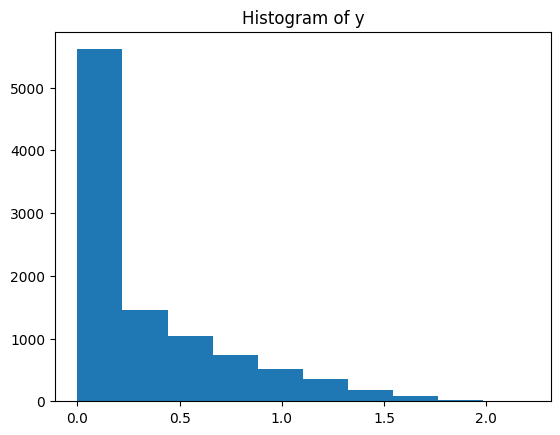

In [186]:
# Plot historgram of y
plt.hist(y.cpu().detach().numpy(), bins=10)
plt.title('Histogram of y')
plt.show()

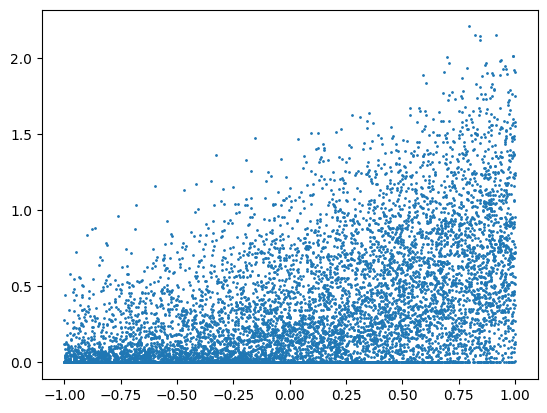

In [209]:
plt.scatter(X[:,0].cpu().detach().numpy(), y.cpu().detach().numpy(),s=1)

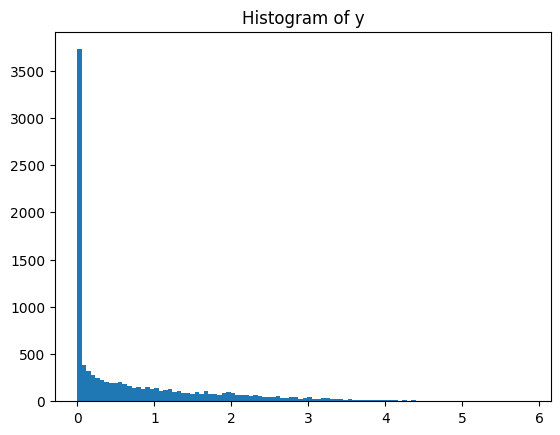

In [167]:
# Plot historgram of y
plt.hist(y.cpu().detach().numpy(), bins=100)
plt.title('Histogram of y')
plt.show()


In [120]:
feature_tensor.shape

torch.Size([10000, 10])

In [108]:
feature_tensor = []
for feature in features:
    for f in feature:
        feature_tensor.append(f.flatten())
feature_tensor = torch.stack(feature_tensor, dim=-1)

In [104]:
feature_tensor[:,].argsort(descending=True)

tensor([2359, 5762, 7304,  ..., 9995, 9996, 9997], device='cuda:0')

In [114]:
feature_tensor.argsort(dim=0, descending=True)

tensor([[6857, 6857, 7379],
        [7379, 9910, 1455],
        [3172, 3172, 6857],
        ...,
        [9984, 9993, 9987],
        [9987, 9996, 9988],
        [9989, 9999, 9996]], device='cuda:0')

In [67]:
eigenmodel.train()
jvps = []
for x in DataLoader(X, batch_size=64):
    jacobian = eigenmodel.compute_jacobian(x)
    jvps.append(eigenmodel(jacobian))
jvps = torch.concat(jvps)

In [70]:
for i in range(jvps.shape[-1]):
    jvps[:,i]

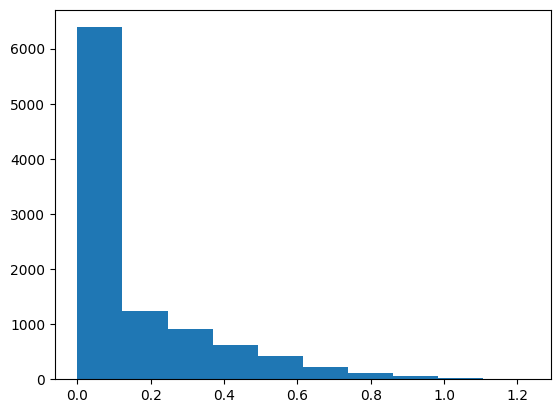

In [73]:
# Plot first and second columns of y 
plt.hist(y[:,0].detach().cpu(), bins=10)
plt.show()

In [74]:
list(subnetwork.parameters())

[Parameter containing:
 tensor([[0.6432, 0.9286, 0.9307, 0.2688, 0.7132, 0.6686, 0.1310, 0.7190, 0.8271,
          0.5983]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0.], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([[0.8675]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0.], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([[0.4156]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0.], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([[0.8392],
         [0.0639]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0., 0.], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([[0.5392, 0.1208],
         [0.6750, 0.5760]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0., 0.], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([[0.7209, 0.0809]], device='cuda:0', requires

In [4]:
list(subnetwork.named_parameters())

[('parallel_layers.0.0.model.0.weight',
  Parameter containing:
  tensor([[-0.2043,  0.2692,  0.2840,  0.0827, -0.1073],
          [-0.4125, -0.1665,  0.0380,  0.0125,  0.3771],
          [-0.2015,  0.1067, -0.4292,  0.0832,  0.3765],
          [ 0.0612, -0.1870, -0.4071, -0.2270, -0.3173]], device='cuda:0',
         requires_grad=True)),
 ('parallel_layers.0.0.model.0.bias',
  Parameter containing:
  tensor([ 0.2455,  0.1111, -0.4175, -0.1467], device='cuda:0',
         requires_grad=True)),
 ('parallel_layers.0.0.model.2.weight',
  Parameter containing:
  tensor([[-0.0793,  0.3209,  0.2836,  0.3397]], device='cuda:0',
         requires_grad=True)),
 ('parallel_layers.0.0.model.2.bias',
  Parameter containing:
  tensor([0.2207], device='cuda:0', requires_grad=True)),
 ('parallel_layers.0.1.model.0.weight',
  Parameter containing:
  tensor([[-0.4292, -0.0798, -0.0406,  0.3181,  0.3206],
          [-0.3594, -0.4460,  0.1842, -0.0014, -0.0027],
          [-0.3120, -0.0999,  0.1221, -0.16

In [13]:
X

tensor([[ 0.4408,  0.7884, -0.7275,  0.7427, -0.1067],
        [-0.4308,  0.9829,  0.6540,  0.9520,  0.0159],
        [ 0.1649,  0.6910, -0.2041,  0.0672, -0.9722],
        ...,
        [ 0.7659, -0.5399,  0.9593,  0.2488, -0.8807],
        [-0.1839, -0.4191,  0.3163,  0.9890,  0.7584],
        [ 0.2126,  0.8316,  0.5171,  0.7578,  0.9410]], device='cuda:0')

In [33]:
n_samples = 10000
# Test with dummy input
X = torch.randn(n_samples, input_dim)  # Batch size of 4, 10 input features
y = subnetwork_model(X)
fc_network = CustomMLP(input_dim, [10 for _ in range(5)], output_dim)
train_dataset = TensorDataset(X, y)
eval_dataset = TensorDataset(X, y)

criterion = nn.MSELoss()


Output shape: torch.Size([10000, 2])


In [34]:
# Fully connected MLP 
fc_network = CustomMLP(input_dim, [10 for _ in range(5)], output_dim)

In [39]:
# Train the fully connected network 
# Initialize the trainer and start training
from toy_models.trainer import Trainer
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from cycling_utils import TimestampedTimer
train_dataset = TensorDataset(X, y)
eval_dataset = TensorDataset(X, y)

criterion = nn.MSELoss()


    
timer = TimestampedTimer("Imported TimestampedTimer")
trainer = Trainer(model, nn.MSELoss(), train_dataset, eval_dataset, args, timer)
trainer.train()

[ 2025-01-16 23:50:07 ] Imported TimestampedTimer                                                    0.000 ms,         0.00 s total


NameError: name 'args' is not defined